In [1]:
import pandas as pd
import numpy as np
from pydataset import data 
# from sklearn.datasets import load_iris, iris = load_iris(), 

df = data("iris")


In [23]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [24]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

In [25]:
X = df.iloc[:,:-1]
Y = df.iloc[:,[-1]]

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
naive = GaussianNB()

naive.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
predict = naive.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(Y_test,predict)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [32]:
accuracy_score(Y_test,predict)*100

96.66666666666667

In [9]:
Y_test.head()

,Species
86,versicolor
29,setosa
114,virginica
147,virginica
126,virginica


# --------------------------------------------------------

In [116]:
adult = pd.read_csv("./DataSets/adult.csv")

adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [73]:
adult["workclass"] = adult.workclass.replace({"?":0,"Private":1,"State-gov":2,"Federal-gov":3,"Self-emp-not-inc":4,
                                             "Self-emp-inc":5,"Local-gov":6,"Without-pay":7,"Never-worked":8})

In [74]:
adult["occupation"]=adult.occupation.replace({'?':0, 'Exec-managerial':1, 'Machine-op-inspct':2, 'Prof-specialty':3,
       'Other-service':4, 'Adm-clerical':5, 'Craft-repair':6,'Transport-moving':7, 'Handlers-cleaners':8, 'Sales':9,
       'Farming-fishing':10, 'Tech-support':11, 'Protective-serv':12,'Armed-Forces':13, 'Priv-house-serv':14})

In [44]:
adult.select_dtypes("object").columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
adult.shape

(32561, 15)

In [64]:
dummy = pd.get_dummies(adult[["marital.status",'relationship', 'race', 'sex', 'native.country']])
dummy.shape

(32561, 62)

In [76]:
adult2 = adult[["age","workclass","fnlwgt","education.num","occupation","capital.gain","capital.loss","hours.per.week"]]

final_df = pd.concat([dummy,adult2],axis=1)

In [77]:
final_df.head()

,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,...,native.country_Vietnam,native.country_Yugoslavia,age,workclass,fnlwgt,education.num,occupation,capital.gain,capital.loss,hours.per.week
0,0,0,0,0,0,0,1,0,1,0,...,0,0,90,0,77053,9,0,0,4356,40
1,0,0,0,0,0,0,1,0,1,0,...,0,0,82,1,132870,9,1,0,4356,18
2,0,0,0,0,0,0,1,0,0,0,...,0,0,66,0,186061,10,0,0,4356,40
3,1,0,0,0,0,0,0,0,0,0,...,0,0,54,1,140359,4,2,0,3900,40
4,0,0,0,0,0,1,0,0,0,0,...,0,0,41,1,264663,10,3,0,3900,40


In [117]:
X = final_df
Y = adult["income"]

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [143]:
naive = GaussianNB()
tStart = time()
naive.fit(X_train,Y_train)
print("Training time :",round(time() -tStart, 3),"s")

Training time : 0.072 s


In [144]:
predict = naive.predict(X_test)

confusion_matrix(Y_test,predict)

array([[4694,  249],
       [1073,  497]], dtype=int64)

In [145]:
accuracy_score(Y_test,predict)*100

79.70213419315215

# ========================================

In [129]:
le = LabelEncoder()
for column in adult.columns:
    if adult[column].dtype ==type(object):
        adult[column] = le.fit_transform(adult[column])

In [139]:
list(adult)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [141]:
X = adult[['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',]]
Y = adult["income"]

# ===============================

In [123]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

tStart = time()
multi = MultinomialNB()
multi.fit(X_train,Y_train)
print("Training time :",round(time() -tStart, 3),"s")

Training time : 0.125 s


In [124]:
predict = multi.predict(X_test)
accuracy_score(Y_test,predict)*100

78.3049286043298

In [125]:
from time import time

In [126]:
print("Start training...")
tStart = time()


bern = BernoulliNB()
bern.fit(X_train,Y_train)
print("Training time :",round(time() -tStart, 3),"s")

predict = bern.predict(X_test)
accuracy_score(Y_test,predict)*100

Start training...
Training time : 0.147 s


72.82358360202672

# ROC CURVE

In [146]:
prob = naive.predict_proba(X_test)
prob

array([[9.94127805e-01, 5.87219529e-03],
       [5.26519573e-05, 9.99947348e-01],
       [9.98514257e-01, 1.48574291e-03],
       ...,
       [9.75423786e-01, 2.45762135e-02],
       [0.00000000e+00, 1.00000000e+00],
       [1.25324660e-04, 9.99874675e-01]])

In [147]:
from sklearn.metrics import roc_curve
prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(Y_test, prob_pos)

roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

0.8392115982068189


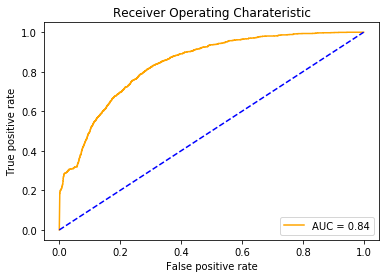

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr,"orange", label="AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")

plt.plot([0,1],[0,1], color = "b", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()